In [1]:
import pandas as pd

In [2]:
pd.read_excel('/content/drive/MyDrive/DataSet/DataTimeSeries.xlsx')

,Ngày,Mở cửa,Đóng cửa,Cao nhất,Thấp nhất
0,28/09/2021,88800,89300,89900,88000
1,27/09/2021,90600,88800,91400,88800
2,24/09/2021,91000,90700,91400,90500
3,23/09/2021,91500,90800,92400,90400
4,22/09/2021,88500,91500,91700,88500
...,...,...,...,...,...
1676,2015-09-01 00:00:00,99500,103000,103000,99000
1677,2015-08-01 00:00:00,98000,98500,99000,97500
1678,2015-07-01 00:00:00,96000,98000,98500,96000
1679,2015-06-01 00:00:00,96000,96000,97000,95000


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split

In [4]:
training_set = pd.read_excel('/content/drive/MyDrive/DataSet/DataTimeSeries.xlsx').iloc[:,1:5].values
print(training_set)

[[88800 89300 89900 88000]
 [90600 88800 91400 88800]
 [91000 90700 91400 90500]
 ...
 [96000 98000 98500 96000]
 [96000 96000 97000 95000]
 [96000 96000 96500 95500]]


In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [13]:
print("Dữ liệu 60 ngày đầu:\n",training_set_scaled[0:60])
print("Lấy cột 'Cao nhất' của ngày 61 làm Label của 60 ngày đầu:\n",training_set_scaled[60], "=>", training_set_scaled[60,2])

Dữ liệu 60 ngày đầu:
 [[0.03899083 0.04271548 0.03769231 0.03323029]
 [0.05275229 0.0389016  0.04923077 0.03941267]
 [0.0558104  0.05339436 0.04923077 0.05255023]
 [0.05963303 0.05415713 0.05692308 0.05177743]
 [0.03669725 0.05949657 0.05153846 0.03709428]
 [0.03287462 0.0389016  0.03       0.0309119 ]
 [0.02981651 0.03813883 0.03153846 0.02782071]
 [0.0206422  0.02135774 0.02615385 0.02009274]
 [0.02140673 0.02059497 0.01153846 0.01700155]
 [0.02370031 0.01830664 0.01384615 0.01854714]
 [0.02675841 0.02517162 0.01769231 0.02241113]
 [0.02140673 0.02669718 0.01846154 0.02009274]
 [0.01146789 0.02135774 0.01538462 0.01004637]
 [0.01299694 0.01144165 0.00384615 0.01004637]
 [0.01987768 0.0129672  0.01       0.01236476]
 [0.03134557 0.01983219 0.02153846 0.02009274]
 [0.0351682  0.03508772 0.02923077 0.03477589]
 [0.02828746 0.03356217 0.02923077 0.02704791]
 [0.02905199 0.02822273 0.02       0.02627512]
 [0.02599388 0.02822273 0.02       0.02550232]
 [0.02828746 0.02517162 0.01923077 0.0

In [ ]:
train_x = []
train_y = []
num_of_sample = len(training_set)

#60 ngày một lần, ngày 61 là label của 60 ngày trước - bài toán dự đoán
for i in range(60, num_of_sample):
    train_x.append(training_set_scaled[i-60:i])
    train_y.append(training_set_scaled[i,2])

In [ ]:
train_x, train_y = np.array(train_x), np.array(train_y)

In [ ]:
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 4))

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size = 0.05)

In [ ]:
regressor = Sequential()
regressor.add(LSTM(50, return_sequences=True, input_shape=(train_x.shape[1],4)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(50))
regressor.add(Dropout(0.2))
regressor.add(Dense(1))
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11000     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [ ]:
regressor.fit(train_x, train_y, epochs=100, batch_size=8)

Epoch 1/100
193/193 [==============================] - 22s 57ms/step - loss: 0.0095
Epoch 2/100
193/193 [==============================] - 11s 57ms/step - loss: 0.0052
Epoch 3/100
193/193 [==============================] - 11s 58ms/step - loss: 0.0041
Epoch 4/100
193/193 [==============================] - 11s 57ms/step - loss: 0.0037
Epoch 5/100
193/193 [==============================] - 11s 57ms/step - loss: 0.0034
Epoch 6/100
193/193 [==============================] - 11s 57ms/step - loss: 0.0034
Epoch 7/100
193/193 [==============================] - 11s 57ms/step - loss: 0.0031
Epoch 8/100
193/193 [==============================] - 11s 57ms/step - loss: 0.0027
Epoch 9/100
193/193 [==============================] - 11s 57ms/step - loss: 0.0023
Epoch 10/100
193/193 [==============================] - 11s 57ms/step - loss: 0.0024
Epoch 11/100
193/193 [==============================] - 11s 57ms/step - loss: 0.0022
Epoch 12/100
193/193 [==============================] - 11s 57ms/step - lo

In [ ]:
predicted_stock_price = regressor.predict(test_x).reshape(-1)

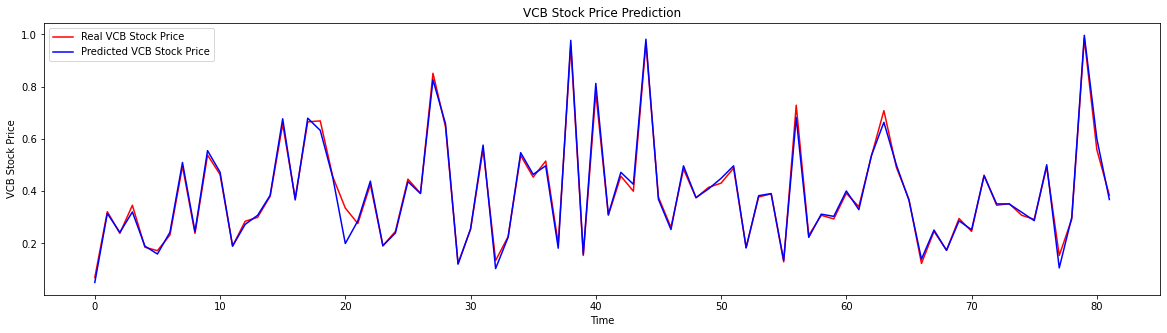

In [ ]:
_, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(test_y,color="red",label="Real VCB Stock Price")
ax.plot(predicted_stock_price,color="blue",label="Predicted VCB Stock Price")
ax.set_title("VCB Stock Price Prediction")
ax.set_xlabel("Time")
ax.set_ylabel('VCB Stock Price')
ax.legend()
plt.show()